# Log Analysis with CountVectorizer for npm_capture

In [1]:
import pandas as pd
import plotly.plotly as py

In [2]:
df = pd.read_csv("../input/npm_noh.txt",sep=';',index_col=False,
                 header=None,names=['level','component','file','line_#','function','log_entry'])

In [3]:
df.head()

,level,component,file,line_#,function,log_entry
0,INFO,Pkt_Share,pkt_comm_server.cpp,378,bool npm_capture::pkt_comm_server::request_han...,CLIP CONN alloy_probe_s_0000016839 response: c...
1,INFO,Pkt_Share,pkt_comm_server.cpp,583,void npm_capture::pkt_comm_server::check_conn_...,CLIP CONN alloy_probe_s_0000016839 scheduled t...
2,INFO,Pkt_Share,pkt_comm_server.cpp,277,bool npm_capture::pkt_comm_server::request_han...,Connection request: consumer alloy_probe_s_000...
3,INFO,Pkt_Share,pkt_comm_server.cpp,312,bool npm_capture::pkt_comm_server::request_han...,Clip cmd 0 (id 48447296) on job uuid: e1706e47...
4,INFO,Pkt_Share,pkt_comm_server.cpp,373,bool npm_capture::pkt_comm_server::request_han...,CLIP CONN alloy_probe_s_0000016840 started cor...


In [4]:
# check for non INFO logs as well as any specific string within log entry
pd.options.display.max_colwidth = 100 # controls max display
#df[(df.level != 'INFO') & ~df.log_entry.str.contains("too long")]['log_entry']
df = df[df.level != 'INFO']
df[:]['log_entry']

3852      Consumer probe_aux_all took too long to release buffer (# of slow buffers: 1, slowest: 1997 ms)
8459      Consumer probe_aux_all took too long to release buffer (# of slow buffers: 1, slowest: 1062 ms)
8460     Consumer probe_aux_all took too long to release buffer (# of slow buffers: 14, slowest: 1310 ms)
13644     Consumer probe_aux_all took too long to release buffer (# of slow buffers: 1, slowest: 1737 ms)
13647                            probe_all reached max packets buffering and 1948347 pkts will be dropped
13648                            probe_all reached max packets buffering and 8117415 pkts will be dropped
13649                            probe_all reached max packets buffering and 8239601 pkts will be dropped
13650                            probe_all reached max packets buffering and 8259992 pkts will be dropped
13651                            probe_all reached max packets buffering and 9032300 pkts will be dropped
13652                            probe_all rea

In [5]:
df.log_entry[3852]

'Consumer probe_aux_all took too long to release buffer (# of slow buffers: 1, slowest: 1997 ms)'

In [14]:
?WordCloud

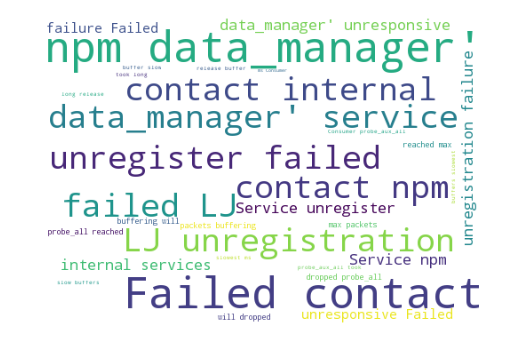

In [36]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
% matplotlib inline

def plot_world_cloud (text):
    # Create stopword list:
    stopwords = set(STOPWORDS)
    stopwords.update(["pkts", "msec", "file"])

    # Create and generate a word cloud image:
    wordcloud = WordCloud(width=500, height=350, stopwords=stopwords, max_words=100, background_color="white").generate(text)
    #wordcloud = WordCloud(width=500, height=350, max_words=100, background_color="white").generate(text)

    # Display the generated image:
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

# get all log entries
text = " ".join(entry for entry in df.log_entry)
plot_world_cloud(text)

## Count Unigrams

In [22]:
from sklearn.feature_extraction.text import CountVectorizer

def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(df['log_entry'], 20)
for word, freq in common_words:
    print(word, freq)

/Users/kselvadurai/anaconda/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning:

numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88

/Users/kselvadurai/anaconda/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning:

numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88

/Users/kselvadurai/anaconda/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning:

numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88

/Users/kselvadurai/anaconda/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning:

numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88



failed 171
service 171
contact 114
npm 114
data_manager 114
unresponsive 57
unregister 57
failure 57
internal 57
unregistration 57
services 57
lj 57
dropped 11
reached 11
buffering 11
pkts 11
max 11
probe_all 11
packets 11
took 4


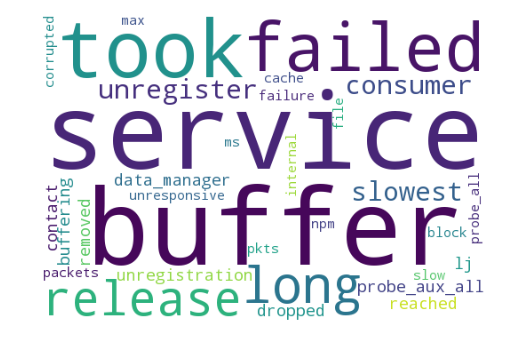

In [32]:
text = " ".join(word for word,freq in get_top_n_words(df['log_entry'], 100))

plot_world_cloud(text)

## Bigrams

In [26]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_bigram(df['log_entry'], 20)
for word, freq in common_words:
    print(word, freq)

to contact 114
npm data_manager 114
failed to 114
data_manager is 57
service npm 57
unregister failed 57
failed lj 57
contact npm 57
is unresponsive 57
internal services 57
data_manager service 57
service unregister 57
contact internal 57
lj unregistration 57
unregistration failure 57
will be 12
probe_all reached 11
max packets 11
reached max 11
pkts will 11


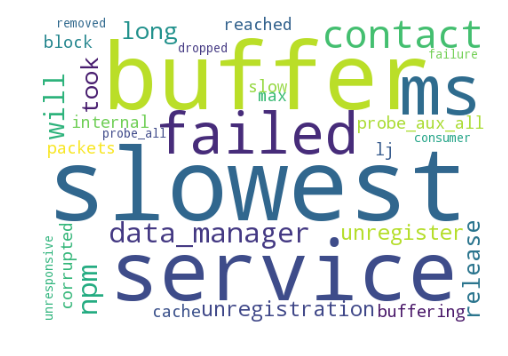

In [40]:
text = " ".join(word.lower() for word,freq in get_top_n_bigram(df['log_entry'], 100))

plot_world_cloud(text)

## Trigrams

In [38]:
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_trigram(df['log_entry'], 20)
for word, freq in common_words:
    print(word,"\t",freq)

failed to contact 	 114
contact npm data_manager 	 57
lj unregistration failure 	 57
npm data_manager service 	 57
service unregister failed 	 57
npm data_manager is 	 57
contact internal services 	 57
failed lj unregistration 	 57
data_manager is unresponsive 	 57
unregister failed lj 	 57
to contact npm 	 57
to contact internal 	 57
service npm data_manager 	 57
packets buffering and 	 11
pkts will be 	 11
will be dropped 	 11
probe_all reached max 	 11
max packets buffering 	 11
reached max packets 	 11
to release buffer 	 4


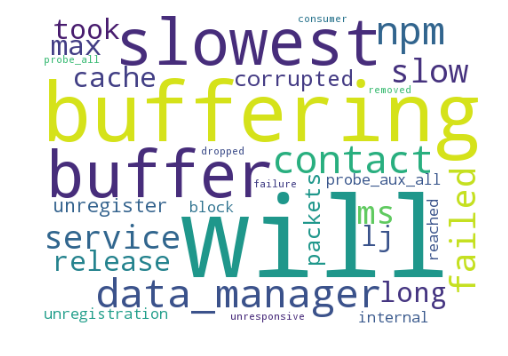

In [39]:
text = " ".join(word for word,freq in get_top_n_trigram(df['log_entry'], 100))

plot_world_cloud(text)